<a href="https://colab.research.google.com/github/W83w/-Courses/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 4.9 MB/s 


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import pandas as pd # для работы с таблицами

In [ ]:
w = TimeSeriesKMeans(n_clusters=2)

In [ ]:
import pandas as pd
dfL = []
for i in range(1, 13):
  if i >= 10:
    n = str(i)
  else:
    n = '0' + str(i)
df_comfimed = pd.read_csv('/content/drive/MyDrive/time_series_covid19_confirmed_global.csv')
df_comfimed.head(3)#подтвержденные случаи 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205612,205802,205830,205907,206073,206133,206145,206206,206273,206331
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333330,333330,333338,333343,333360,333381,333391,333408,333413,333455
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271061,271079,271082,271090,271096,271100,271102,271107,271113,271122


In [ ]:
df_deaths = pd.read_csv('/content/drive/MyDrive/time_series_covid19_deaths_global.csv') # смертность
df_deaths.head(3)#Смертность

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7834,7834,7834,7834,7835,7835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881


In [ ]:
from tslearn.utils import to_time_series_dataset

In [ ]:
ts = to_time_series_dataset(dfL)

Country_Region_num = list(set(df_comfimed['Country/Region']))
               #['iso3'] , ['Admin2'] , ['Province_State'] ,['Country_Region'])) # Избавляемся от слов преобразуя в числа
Country_Region_deaths = list(set(df_deaths['Country/Region']))
df_comfimed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205612,205802,205830,205907,206073,206133,206145,206206,206273,206331
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333330,333330,333338,333343,333360,333381,333391,333408,333413,333455
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271061,271079,271082,271090,271096,271100,271102,271107,271113,271122


In [ ]:
d = {} 
for i in range(len(df_comfimed['Country/Region'])):
  d.update({df_comfimed['Country/Region'][i]: i})

print(d)
df_comfimed

d_deaths = {} 
for i in range(len(df_deaths['Country/Region'])):
  d_deaths.update({df_deaths['Country/Region'][i]: i})

print(d)
print(d_deaths)
# создаю словарь и пробегаюсь в цикле И обнавляю названия  :, "b":"d"  df.loc[:, 'foo':'cat':2]

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Andorra': 3, 'Angola': 4, 'Antarctica': 5, 'Antigua and Barbuda': 6, 'Argentina': 7, 'Armenia': 8, 'Australia': 16, 'Austria': 17, 'Azerbaijan': 18, 'Bahamas': 19, 'Bahrain': 20, 'Bangladesh': 21, 'Barbados': 22, 'Belarus': 23, 'Belgium': 24, 'Belize': 25, 'Benin': 26, 'Bhutan': 27, 'Bolivia': 28, 'Bosnia and Herzegovina': 29, 'Botswana': 30, 'Brazil': 31, 'Brunei': 32, 'Bulgaria': 33, 'Burkina Faso': 34, 'Burma': 35, 'Burundi': 36, 'Cabo Verde': 37, 'Cambodia': 38, 'Cameroon': 39, 'Canada': 55, 'Central African Republic': 56, 'Chad': 57, 'Chile': 58, 'China': 92, 'Colombia': 93, 'Comoros': 94, 'Congo (Brazzaville)': 95, 'Congo (Kinshasa)': 96, 'Costa Rica': 97, "Cote d'Ivoire": 98, 'Croatia': 99, 'Cuba': 100, 'Cyprus': 101, 'Czechia': 102, 'Denmark': 105, 'Diamond Princess': 106, 'Djibouti': 107, 'Dominica': 108, 'Dominican Republic': 109, 'Ecuador': 110, 'Egypt': 111, 'El Salvador': 112, 'Equatorial Guinea': 113, 'Eritrea': 114, 'Estoni

In [ ]:
df_comfimed['Country_Region_num'] = ''
#Добавляю столбец
for index, row in df_comfimed.iterrows():
  df_comfimed['Country_Region_num'].iloc[index] = d[row['Country/Region']]
#Пепебираю все строки В новый столбец в новый столбец данные из того списка  
df_comfimed.head()


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22,Country_Region_num
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205802,205830,205907,206073,206133,206145,206206,206273,206331,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333330,333338,333343,333360,333381,333391,333408,333413,333455,1
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271079,271082,271090,271096,271100,271102,271107,271113,271122,2
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46824,46824,47219,47219,47219,47219,47219,47219,47219,3
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104491,104491,104676,104676,104676,104676,104676,104750,104750,4


In [ ]:
df_deaths['Country_Region_deaths'] = ''
#Добавляю столбец
for index, row in df_comfimed.iterrows():
  df_deaths['Country_Region_deaths'].iloc[index] = d_deaths[row['Country/Region']]
#Пепебираю все строки В новый столбец в новый столбец данные из того списка  
df_deaths.head()


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22,Country_Region_deaths
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7834,7834,7834,7834,7835,7835,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,1
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,2
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,156,156,157,157,157,157,157,157,157,3
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1923,1923,1924,1924,1924,1924,1924,1925,1925,4


In [ ]:
df2 = df_comfimed.loc['12/6/21':'Country_Region_num']
df2
df_comfimed_22 = df_comfimed.loc[:, "12/6/21":"Country_Region_num":1]
print(df_comfimed_22)

df_comfimed_22_data = df_comfimed.loc[:, "12/6/21":"12/6/22":1]


     12/6/21  12/7/21  12/8/21  12/9/21  12/10/21  12/11/21  12/12/21  \
0     157499   157508   157542   157585    157603    157611    157633   
1     201902   202295   202641   202863    203215    203524    203787   
2     211662   211859   212047   212224    212434    212652    212848   
3      18631    18815    18815    19272     19440     19440     19440   
4      65259    65301    65332    65346     65371     65397     65404   
..       ...      ...      ...      ...       ...       ...       ...   
284   462219   462621   462958   463277    463573    463573    463573   
285        0        0        0        0         0         0         0   
286    10034    10043    10047    10047     10056     10063     10069   
287   210327   210374   210436   210562    210724    210959    211077   
288   139046   141601   150628   155817    155817    165002    167140   

     12/13/21  12/14/21  12/15/21  ...  11/28/22  11/29/22  11/30/22  12/1/22  \
0      157648    157660    157665  ...    

In [ ]:
df2_d = df_deaths.loc['12/6/21':'Country_Region_deaths']
df2_d
df_d_22 = df_deaths.loc[:, "12/6/21":"Country_Region_deaths":1]
print(df_d_22)
df_d_22_data = df_comfimed.loc[:, "12/6/21":"12/6/22":1]

     12/6/21  12/7/21  12/8/21  12/9/21  12/10/21  12/11/21  12/12/21  \
0       7316     7317     7319     7321      7324      7325      7328   
1       3115     3122     3126     3128      3130      3132      3134   
2       6111     6114     6122     6126      6132      6137      6145   
3        133      133      133      133       133       133       133   
4       1735     1735     1735     1736      1737      1737      1737   
..       ...      ...      ...      ...       ...       ...       ...   
284     4817     4822     4823     4826      4830      4830      4830   
285        0        0        0        0         0         0         0   
286     1955     1955     1956     1957      1962      1968      1971   
287     3668     3668     3668     3668      3668      3669      3670   
288     4710     4713     4720     4723      4723      4735      4738   

     12/13/21  12/14/21  12/15/21  ...  11/28/22  11/29/22  11/30/22  12/1/22  \
0        7328      7329      7331  ...    

In [ ]:
y = list(df_comfimed['1/6/21']) #Что бы построить график 

In [ ]:
print(len(df_comfimed.columns))
df_comfimed.columns # все колонки

1055


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/28/22', '11/29/22', '11/30/22', '12/1/22', '12/2/22', '12/3/22',
       '12/4/22', '12/5/22', '12/6/22', 'Country_Region_num'],
      dtype='object', length=1055)

In [ ]:
from sklearn.preprocessing import StandardScaler

2


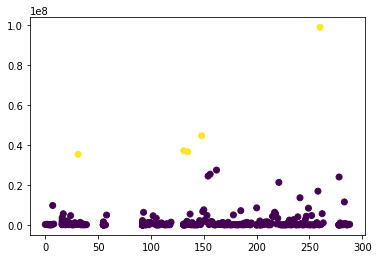

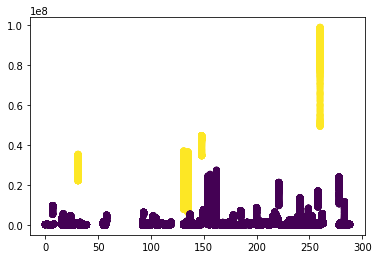

3


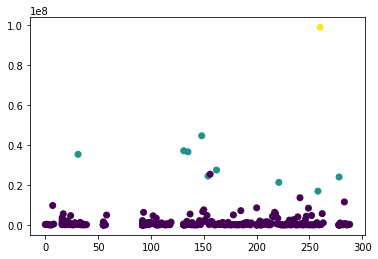

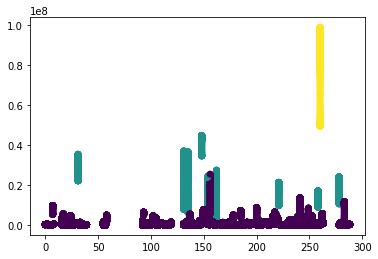

4


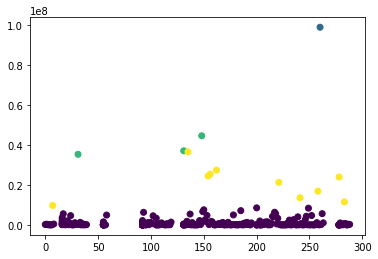

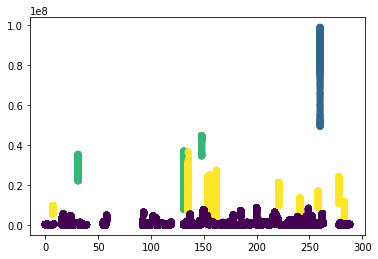

5


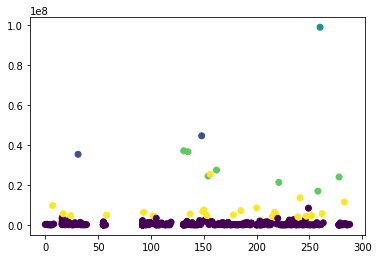

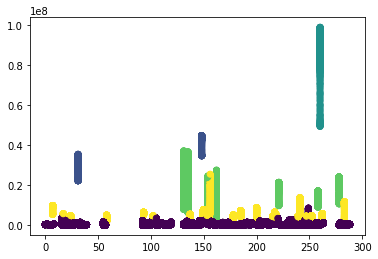

6


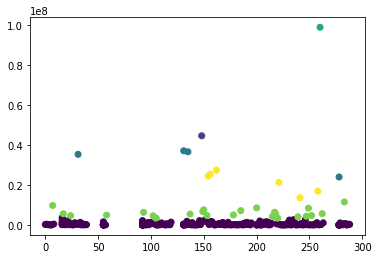

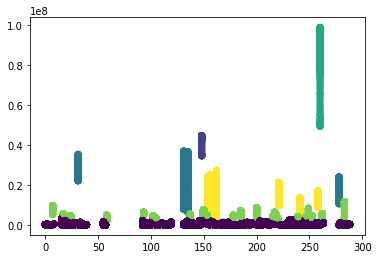

7


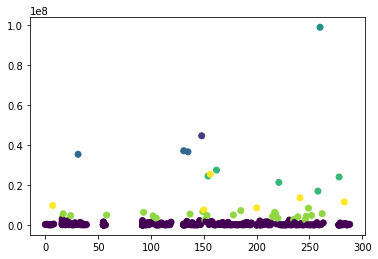

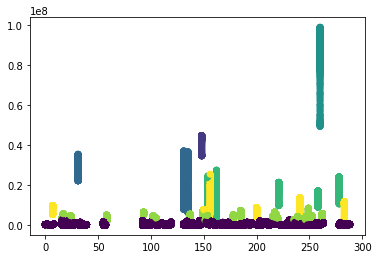

8


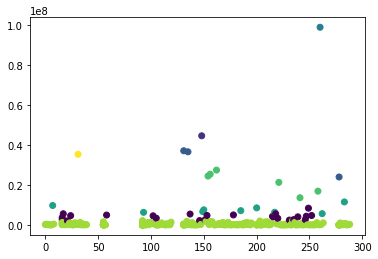

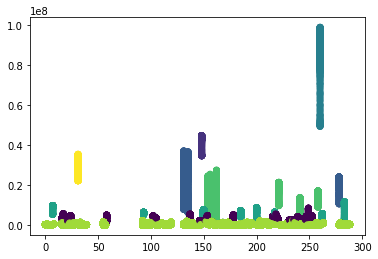

9


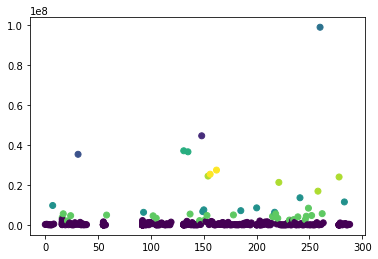

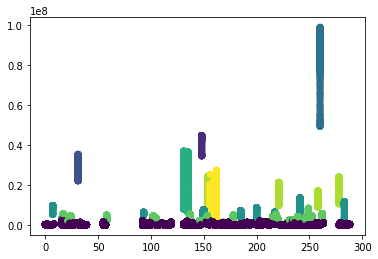

10


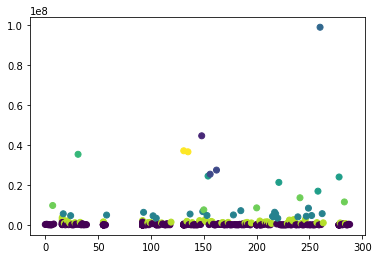

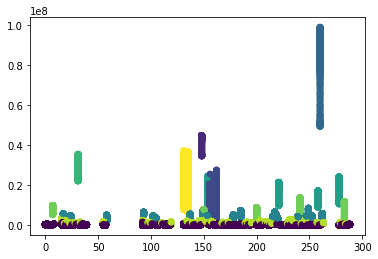

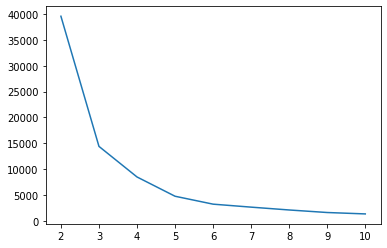

In [ ]:
import matplotlib.pyplot as plt # чтобы определить 17 к записей разделить на некоторое кол кластеров
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledDF = sc.fit_transform(df_comfimed_22)
wcss = []
for i in range(2, 11):
  kmean = KMeans(n_clusters=i)
  kmean.fit(scaledDF)
  print(i)
  day = plt.scatter(df_comfimed_22["Country_Region_num"], df_comfimed_22['12/6/22'], c=kmean.labels_)
  plt.show(day)
  for i in df_comfimed_22_data:
    plt.scatter(df_comfimed_22["Country_Region_num"], df_comfimed_22[i], c=kmean.labels_)
  plt.show()
  wcss.append(kmean.inertia_)
plt.plot(range(2,11), wcss) # кол кластеров 2 11
plt.show()
# в конце графи мера разброса график локтя 

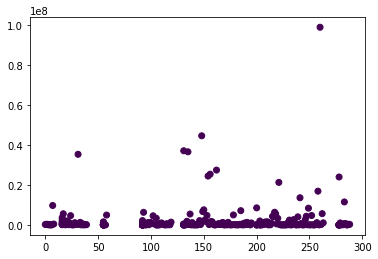

1


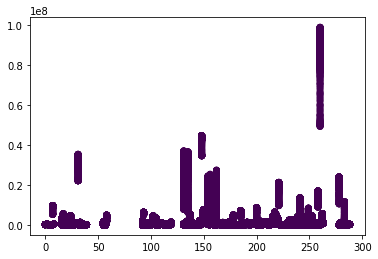

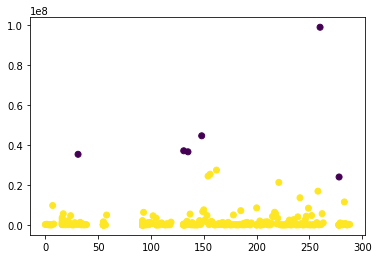

2


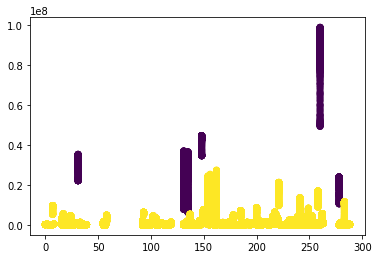

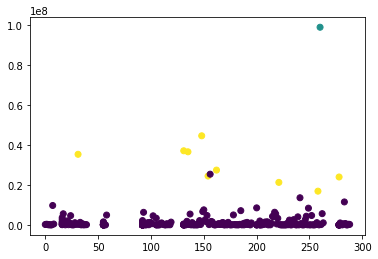

3


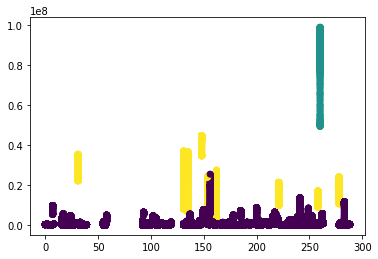

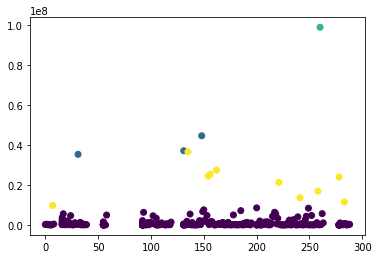

4


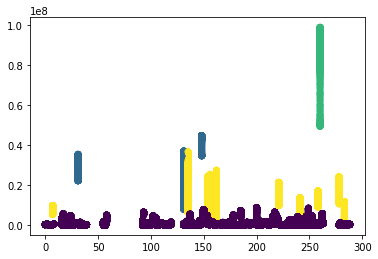

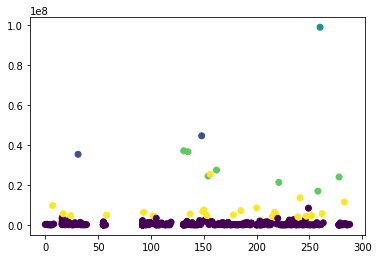

5


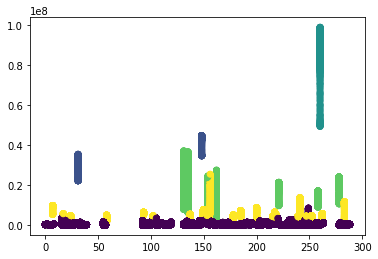

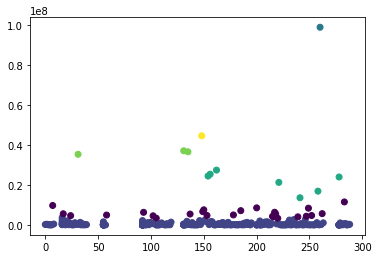

6


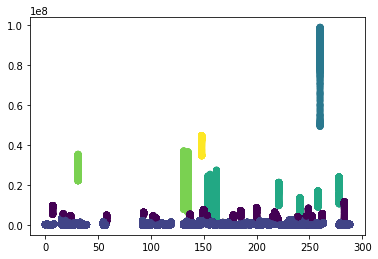

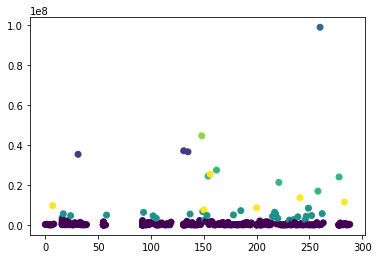

7


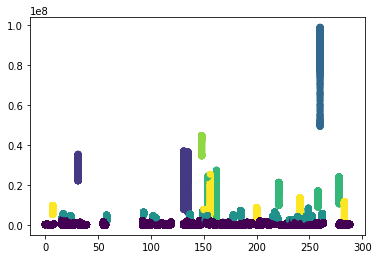

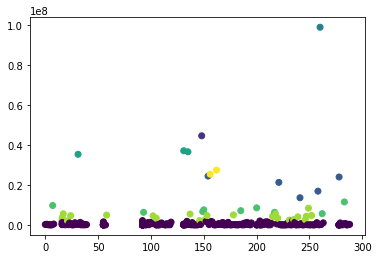

8


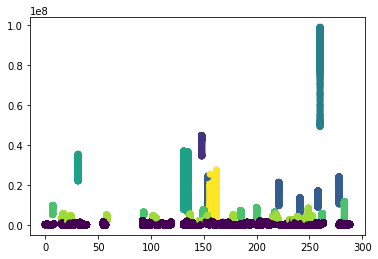

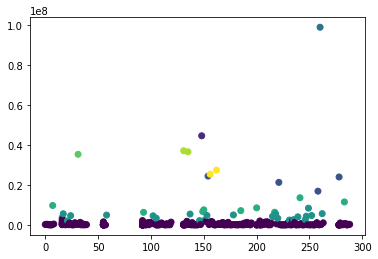

9


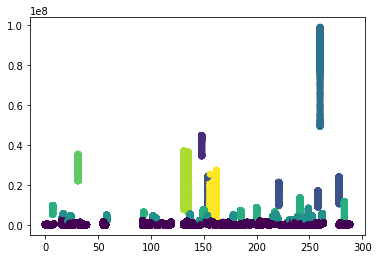

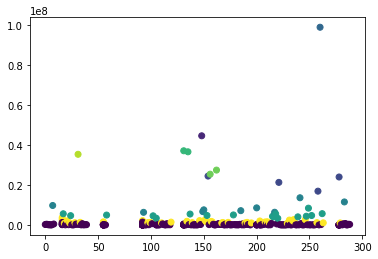

10


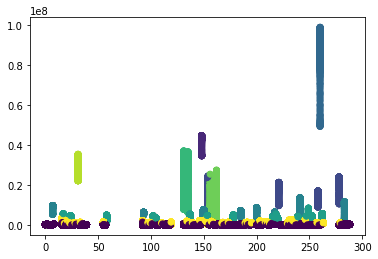

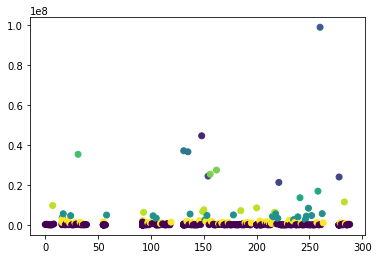

11


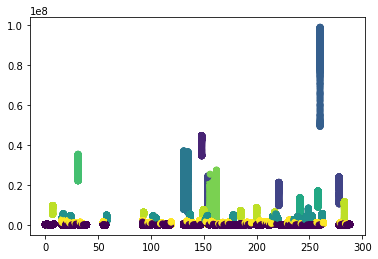

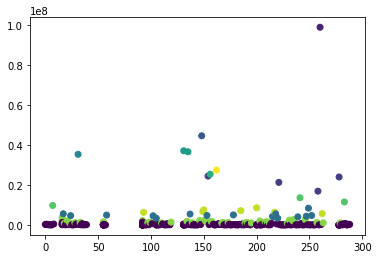

12


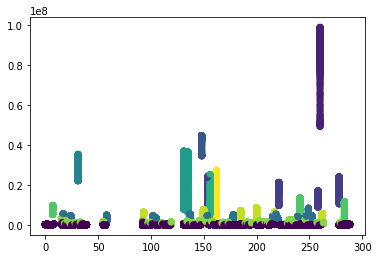

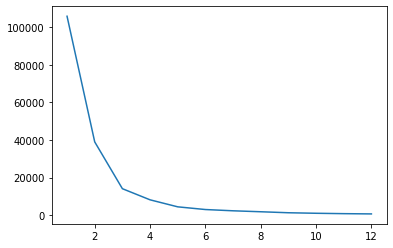

In [ ]:
import matplotlib.pyplot as plt # чтобы определить 17 к записей разделить на некоторое кол кластеров
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledDF = sc.fit_transform(df_d_22_data)
wcss = []
for i in range(1, 13):
  kmean = KMeans(n_clusters=i)
  kmean.fit(scaledDF)
  day = plt.scatter(df_d_22["Country_Region_deaths"], df_d_22_data['12/6/22'], c=kmean.labels_)
  plt.show()
  print(i)
  for i in df_d_22_data:
    plt.scatter(df_d_22["Country_Region_deaths"], df_d_22_data[i], c=kmean.labels_)
  plt.show()
  wcss.append(kmean.inertia_)
plt.plot(range(1, 13), wcss) # кол кластеров 2 11
plt.show()

Здесь видно как за год увеличивалось общее количество заразившихся и умерших

> Блок с отступами

